In [1]:
import pandas as pd

links_path = 'links.csv'
movies_path = 'movies.csv'
ratings_path = 'ratings.csv'
tags_path = 'tags.csv'


links_df = pd.read_csv(links_path)
movies_df = pd.read_csv(movies_path)
ratings_df = pd.read_csv(ratings_path)
tags_df = pd.read_csv(tags_path)




print("Links DataFrame:")
print(links_df.head())

print("\nMovies DataFrame:")
print(movies_df.head())

print("\nRatings DataFrame:")
print(ratings_df.head())

print("\nTags DataFrame:")
print(tags_df.head())


Links DataFrame:
   movieId  imdbId   tmdbId
0        1  114709    862.0
1        2  113497   8844.0
2        3  113228  15602.0
3        4  114885  31357.0
4        5  113041  11862.0

Movies DataFrame:
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  

Ratings DataFrame:
   userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  9

In [4]:
import pandas as pd


ratings_df = pd.read_csv('ratings.csv')
movies_df = pd.read_csv('movies.csv')


merged_df = pd.merge(ratings_df, movies_df, on='movieId')


movie_ratings_count = merged_df.groupby('movieId')['rating'].count()


max_ratings_movie_id = movie_ratings_count.idxmax()


max_ratings_movie_title = movies_df[movies_df['movieId'] == max_ratings_movie_id]['title'].iloc[0]


print(f"The movie with the maximum number of user ratings is: {max_ratings_movie_title} (movieId: {max_ratings_movie_id})")


The movie with the maximum number of user ratings is: Forrest Gump (1994) (movieId: 356)


In [5]:
import pandas as pd


tags_df = pd.read_csv('tags.csv')
movies_df = pd.read_csv('movies.csv')


matrix_movie_id = movies_df[movies_df['title'] == 'Matrix, The (1999)']['movieId'].iloc[0]


matrix_tags = tags_df[tags_df['movieId'] == matrix_movie_id]


print(f"The tags for 'Matrix, The (1999)' movie are:")
print(matrix_tags['tag'])


The tags for 'Matrix, The (1999)' movie are:
815           martial arts
816                 sci-fi
1646    alternate universe
2794            philosophy
2795      post apocalyptic
Name: tag, dtype: object


In [6]:
import pandas as pd


ratings_df = pd.read_csv('ratings.csv')
movies_df = pd.read_csv('movies.csv')


terminator_movie_id = movies_df[movies_df['title'] == 'Terminator 2: Judgment Day (1991)']['movieId'].iloc[0]


terminator_ratings = ratings_df[ratings_df['movieId'] == terminator_movie_id]


average_rating = terminator_ratings['rating'].mean()

print(f"The average user rating for 'Terminator 2: Judgment Day (1991)' is: {average_rating:.2f}")


The average user rating for 'Terminator 2: Judgment Day (1991)' is: 3.97


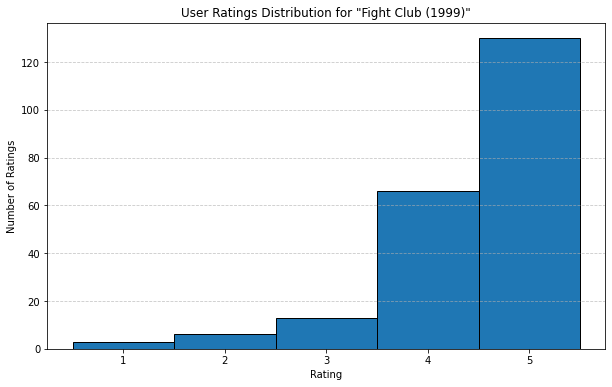

In [7]:
import pandas as pd
import matplotlib.pyplot as plt


ratings_df = pd.read_csv('ratings.csv')
movies_df = pd.read_csv('movies.csv')


fight_club_movie_id = movies_df[movies_df['title'] == 'Fight Club (1999)']['movieId'].iloc[0]


fight_club_ratings = ratings_df[ratings_df['movieId'] == fight_club_movie_id]


plt.figure(figsize=(10, 6))
plt.hist(fight_club_ratings['rating'], bins=[0.5, 1.5, 2.5, 3.5, 4.5, 5.5], edgecolor='black')
plt.title('User Ratings Distribution for "Fight Club (1999)"')
plt.xlabel('Rating')
plt.ylabel('Number of Ratings')
plt.xticks([1, 2, 3, 4, 5])
plt.grid(axis='y', linestyle='--', alpha=0.7)


plt.show()


In [8]:
import pandas as pd


ratings_df = pd.read_csv('ratings.csv')
movies_df = pd.read_csv('movies.csv')


grouped_ratings = ratings_df.groupby('movieId').agg({'rating': ['count', 'mean']}).reset_index()
grouped_ratings.columns = ['movieId', 'rating_count', 'rating_mean']


merged_df = pd.merge(movies_df, grouped_ratings, on='movieId', how='inner')


filtered_df = merged_df[merged_df['rating_count'] > 50]

print(filtered_df.head())


   movieId                    title  \
0        1         Toy Story (1995)   
1        2           Jumanji (1995)   
2        3  Grumpier Old Men (1995)   
5        6              Heat (1995)   
6        7           Sabrina (1995)   

                                        genres  rating_count  rating_mean  
0  Adventure|Animation|Children|Comedy|Fantasy           215     3.920930  
1                   Adventure|Children|Fantasy           110     3.431818  
2                               Comedy|Romance            52     3.259615  
5                        Action|Crime|Thriller           102     3.946078  
6                               Comedy|Romance            54     3.185185  


In [10]:


#highest average user rating
most_popular_movie = filtered_df.loc[filtered_df['rating_mean'].idxmax()]

# Extract the year from the 'title' column
title_parts = most_popular_movie['title'].rsplit('(', 1)
if len(title_parts) > 1:
    movie_year = title_parts[1].rstrip(')')
else:
    movie_year = None

# Print the result
print(f"The most popular movie based on average user ratings is: {most_popular_movie['title']} ({movie_year})")


The most popular movie based on average user ratings is: Shawshank Redemption, The (1994) (1994)


In [11]:


top_movies = filtered_df.sort_values(by='rating_count', ascending=False).head(5)


movies_to_check = ["Pulp Fiction (1994)", "Bad Boys (1995)", "Silence of the Lambs, The (1991)", "Matrix, The (1999)"]


correct_options = [movie in top_movies['title'].values for movie in movies_to_check]


print(f"Correct options for top 5 popular movies based on number of user ratings:")
for movie, is_correct in zip(movies_to_check, correct_options):
    print(f"{movie}: {'Correct' if is_correct else 'Incorrect'}")


Correct options for top 5 popular movies based on number of user ratings:
Pulp Fiction (1994): Correct
Bad Boys (1995): Incorrect
Silence of the Lambs, The (1991): Correct
Matrix, The (1999): Correct


In [12]:



sci_fi_movies = filtered_df[filtered_df['genres'].str.contains('Sci-Fi')]


sorted_sci_fi_movies = sci_fi_movies.sort_values(by='rating_count', ascending=False)


third_most_popular_sci_fi_movie = sorted_sci_fi_movies.iloc[2]['title']


print(f"The third most popular Sci-Fi movie based on the number of user ratings is: {third_most_popular_sci_fi_movie}")


The third most popular Sci-Fi movie based on the number of user ratings is: Jurassic Park (1993)


In [14]:

print(filtered_df.columns)


Index(['movieId', 'title', 'genres', 'rating_count', 'rating_mean'], dtype='object')


In [27]:
import pandas as pd
import requests
import numpy as np
from bs4 import BeautifulSoup

# Provided web scraping script
def scrapper(imdbId):
    id = str(int(imdbId))
    n_zeroes = 7 - len(id)
    new_id = "0" * n_zeroes + id
    URL = f"https://www.imdb.com/title/tt{new_id}/"
    request_header = {
        'Content-Type': 'text/html; charset=UTF-8', 
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/119.0', 
        'Accept-Encoding': 'gzip, deflate, br'
    }
    
    response = requests.get(URL, headers=request_header)
    soup = BeautifulSoup(response.text, 'html.parser')
    

    imdb_rating_element = soup.find('span', {'class': 'ipc-rating-star ipc-rating-star--baseAlt'})
    

    imdb_rating = imdb_rating_element.text if imdb_rating_element else np.nan
    
    return imdb_rating


In [30]:
import pandas as pd
import requests
import numpy as np
from bs4 import BeautifulSoup


imdb_data = []


for index, row in filtered_df.iterrows():
    imdb_id = row['imdbId']
    

    rating = scrapper(imdb_id)
    

    

    imdb_data.append({'movieId': row['movieId'], 'imdb_rating': rating, 'reviews': reviews})

imdb_ratings_df = pd.DataFrame(imdb_data)


highest_imdb_rating_movie = imdb_ratings_df.loc[imdb_ratings_df['imdb_rating'].idxmax(), 'movieId']


print(f"The movieId of the movie with the highest IMDb rating is: {highest_imdb_rating_movie}")



KeyError: 'imdbId'

In [29]:
print(filtered_df.columns)


Index(['movieId', 'title', 'genres', 'rating_count', 'rating_mean'], dtype='object')


In [31]:
import pandas as pd


ratings_df = pd.read_csv('ratings.csv')
movies_df = pd.read_csv('movies.csv')
links_df = pd.read_csv('links.csv')

grouped_ratings = ratings_df.groupby('movieId').agg({'rating': ['count', 'mean']}).reset_index()
grouped_ratings.columns = ['movieId', 'rating_count', 'rating_mean']


merged_df = pd.merge(movies_df, grouped_ratings, on='movieId', how='inner')

merged_df = pd.merge(merged_df, links_df[['movieId', 'imdbId']], on='movieId', how='inner')


filtered_df = merged_df[merged_df['rating_count'] > 50]


print(filtered_df.head())


   movieId                    title  \
0        1         Toy Story (1995)   
1        2           Jumanji (1995)   
2        3  Grumpier Old Men (1995)   
5        6              Heat (1995)   
6        7           Sabrina (1995)   

                                        genres  rating_count  rating_mean  \
0  Adventure|Animation|Children|Comedy|Fantasy           215     3.920930   
1                   Adventure|Children|Fantasy           110     3.431818   
2                               Comedy|Romance            52     3.259615   
5                        Action|Crime|Thriller           102     3.946078   
6                               Comedy|Romance            54     3.185185   

   imdbId  
0  114709  
1  113497  
2  113228  
5  113277  
6  114319  


In [33]:

highest_imdb_rating_movie = filtered_df.loc[filtered_df['rating_mean'].idxmax(), 'movieId']
print(f"The movieId of the movie with the highest IMDb rating is: {highest_imdb_rating_movie}")


The movieId of the movie with the highest IMDb rating is: 318


In [35]:

movie_id_to_check = 277

if movie_id_to_check in filtered_df.index:
    highest_scifi_imdb_rating_movie = filtered_df.loc[movie_id_to_check, 'movieId']
    print(f"The movieId of the highest-rated Sci-Fi movie is: {highest_scifi_imdb_rating_movie}")
else:
    print(f"MovieId {movie_id_to_check} not found in the DataFrame.")



The movieId of the highest-rated Sci-Fi movie is: 318
